In [19]:
from src import DataLoader 
from src import Backtester
from src.strategies import (
    BuyAndHoldStrategy,
    TrendFollowingStrategy,
    MeanReversionStrategy,
    MomentumStrategy,
    XGBoostStrategy
)
import pandas as pd

In [20]:
loader = DataLoader()
df = loader.load_data("JPM")

if df.empty:
    raise ValueError("No data loaded. Exiting.")
df.head()

--- Loading Data... ---
--- Data is loaded ---


,Open,High,Low,Close,Volume
Date,,,,,
1980-03-17 00:00:00+00:00,1.039059,1.062064,1.039059,1.042893,62775
1980-03-18 00:00:00+00:00,1.042893,1.058230,1.042893,1.050562,64125
1980-03-19 00:00:00+00:00,1.058229,1.069732,1.058229,1.065898,40500
1980-03-20 00:00:00+00:00,1.065898,1.065898,1.054396,1.058230,18900
1980-03-21 00:00:00+00:00,1.058230,1.081235,1.058230,1.081235,97200


In [21]:
strategies = [
    BuyAndHoldStrategy(),
    TrendFollowingStrategy(short_window=20, long_window=50),
    MeanReversionStrategy(short_window=20, long_window=50),
    MomentumStrategy(),
    XGBoostStrategy()
]
backtester = Backtester(
    df=df,
    strategies=strategies,
    initial_capital=10000.0,
    fee=0.001,
)
backtester.run()
metrics = backtester.get_metrics()
metrics_df = pd.DataFrame.from_dict(metrics, orient="index")
metrics_df

--- BackTester running ---
--- Running Strategy 1/5: BuyAndHoldStrategy ---
Buy And Hold Strategy
--- Creating Strategy Features ---
--- Strategy Features Created ---
--- Creating Strategy Signals ---
--- Strategy Signals Created ---
[Timestamp('1980-03-18 00:00:00+0000', tz='UTC')]
--- Strategy 1 completed ---
--- Running Strategy 2/5: TrendFollowingStrategy ---
Trend Following Strategy
--- Creating Strategy Features ---
--- Strategy Features Created ---
--- Creating Strategy Signals ---
--- Strategy Signals Created ---
[Timestamp('1980-03-18 00:00:00+0000', tz='UTC'), Timestamp('1980-05-28 00:00:00+0000', tz='UTC')]
--- Strategy 2 completed ---
--- Running Strategy 3/5: MeanReversionStrategy ---
Mean Reversion Strategy (short_window=20, long_window=50)
--- Creating Strategy Features ---
--- Strategy Features Created ---
--- Creating Strategy Signals ---
--- Strategy Signals Created ---
[Timestamp('1980-03-18 00:00:00+0000', tz='UTC'), Timestamp('1980-05-28 00:00:00+0000', tz='UTC'), 

c:\Users\swiif\OneDrive\Documents\GitHub\bitcoin-backtest\src\strategies\trend_following.py:58: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['Signal'].loc[df[f'SMA_{self.short_window}'] > df[f'SMA_{self.long_window}']] = 1
c:\Users\swiif

,Total Return,Annualized Return,Annualized Volatility,Max Drawdown,Sharpe Ratio
BuyAndHoldStrategy,461.63%,20.82%,33.39%,-43.63%,0.62
TrendFollowingStrategy,48.74%,4.45%,33.43%,-45.90%,0.13
MeanReversionStrategy,-75.05%,-14.12%,31.60%,-76.59%,-0.45
MomentumStrategy,-46.87%,-6.70%,30.97%,-65.47%,-0.22
XGBoostStrategy,-92.71%,-24.95%,33.38%,-93.45%,-0.75


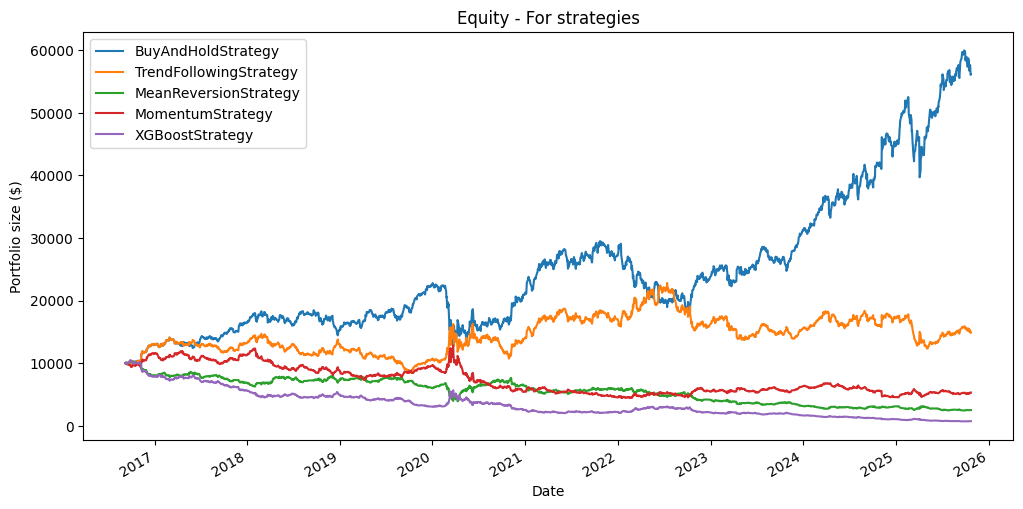

In [22]:
backtester.plot_equity()